# Algoritmo de arbol de decisión

Es un modelo muy popular de regresión utilizado cuando la variable a predecir (dependiente) es cualitativa (es decir númerica discreta, o nóminal); basada en la probabilidad de que un evento ocurra a partir de las variables independientes las cuales pueden ser categoricas o númericas (la importancia) de las variables independientes.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de arboles de decisión; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">aquí</a>

In [1]:
!pip install sklearn

Ahora vamos a agregar la librería que contiene el modelo de regresión logística y la librería datetime, puesto que vamos a crear una función **desicion_tree_algorithm** que recibe como parametro las variables **iterations, train_data, x_variables, y_variable** que hacen referencia la cantidad máxima de iteraciones para la convergencia del modelo, el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn import tree

import datetime

def decision_tree_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = tree.DecisionTreeClassifier(random_state=0)
    model = model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de regresión logística con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.409836,0.180328,0.606557,0.377049,0.262295,0.393443,0.491803,0.573770,0.770492,0.737705,0.081967,0.213115,2.672131,0.688525,0.114754,0.475410,3.098361
std,0.495885,0.387651,0.492568,0.488669,0.443533,0.492568,0.504082,0.498632,0.424006,0.443533,0.276591,0.412907,2.134801,0.466940,0.321370,0.503539,2.241316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
train_data.corr(method='pearson')

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.390868,-0.761762,0.796027,-0.042237,-0.466453,-0.153026,0.448626,0.137744,0.496904,-0.005976,-0.270883,0.428181,0.056639,0.222883,0.341397,-0.486744
feathers,-0.390868,1.000000,0.377760,-0.364908,0.592736,-0.203189,-0.120247,-0.544200,0.255992,0.279682,-0.140153,-0.244097,-0.148901,0.315474,0.098693,-0.019596,-0.231762
eggs,-0.761762,0.377760,1.000000,-0.965978,0.327664,0.236486,-0.080329,-0.694157,-0.439562,-0.403952,0.118322,0.091350,-0.093020,-0.324306,-0.131178,-0.510036,0.730082
milk,0.796027,-0.364908,-0.965978,1.000000,-0.310108,-0.280372,0.046586,0.670540,0.424607,0.463902,-0.232468,-0.074476,0.136453,0.304142,0.144403,0.546305,-0.734410
airbone,-0.042237,0.592736,0.327664,-0.310108,1.000000,-0.327664,-0.362952,-0.541112,-0.117681,0.355556,0.093541,-0.310316,0.162748,-0.001319,0.136096,-0.343769,0.007146
aquatic,-0.466453,-0.203189,0.236486,-0.280372,-0.327664,1.000000,0.483077,0.219149,0.040555,-0.664082,0.126344,0.646169,-0.366625,-0.038014,-0.289973,-0.094737,0.281391
predator,-0.153026,-0.120247,-0.080329,0.046586,-0.362952,0.483077,1.000000,0.184794,0.069030,-0.382505,0.064669,0.288794,-0.203881,-0.046432,-0.251304,0.179763,0.015477
toother,0.448626,-0.544200,-0.694157,0.670540,-0.541112,0.219149,0.184794,1.000000,0.633231,-0.061771,-0.104997,0.448543,-0.243070,0.422455,-0.001705,0.355839,-0.543469
backbone,0.137744,0.255992,-0.439562,0.424607,-0.117681,0.040555,0.069030,0.633231,1.000000,0.206305,-0.263261,0.284031,-0.397534,0.811452,0.074190,0.441501,-0.852736
breathes,0.496904,0.279682,-0.403952,0.463902,0.355556,-0.664082,-0.382505,-0.061771,0.206305,1.000000,-0.229399,-0.508740,0.347714,0.081794,0.214687,0.269143,-0.526881


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

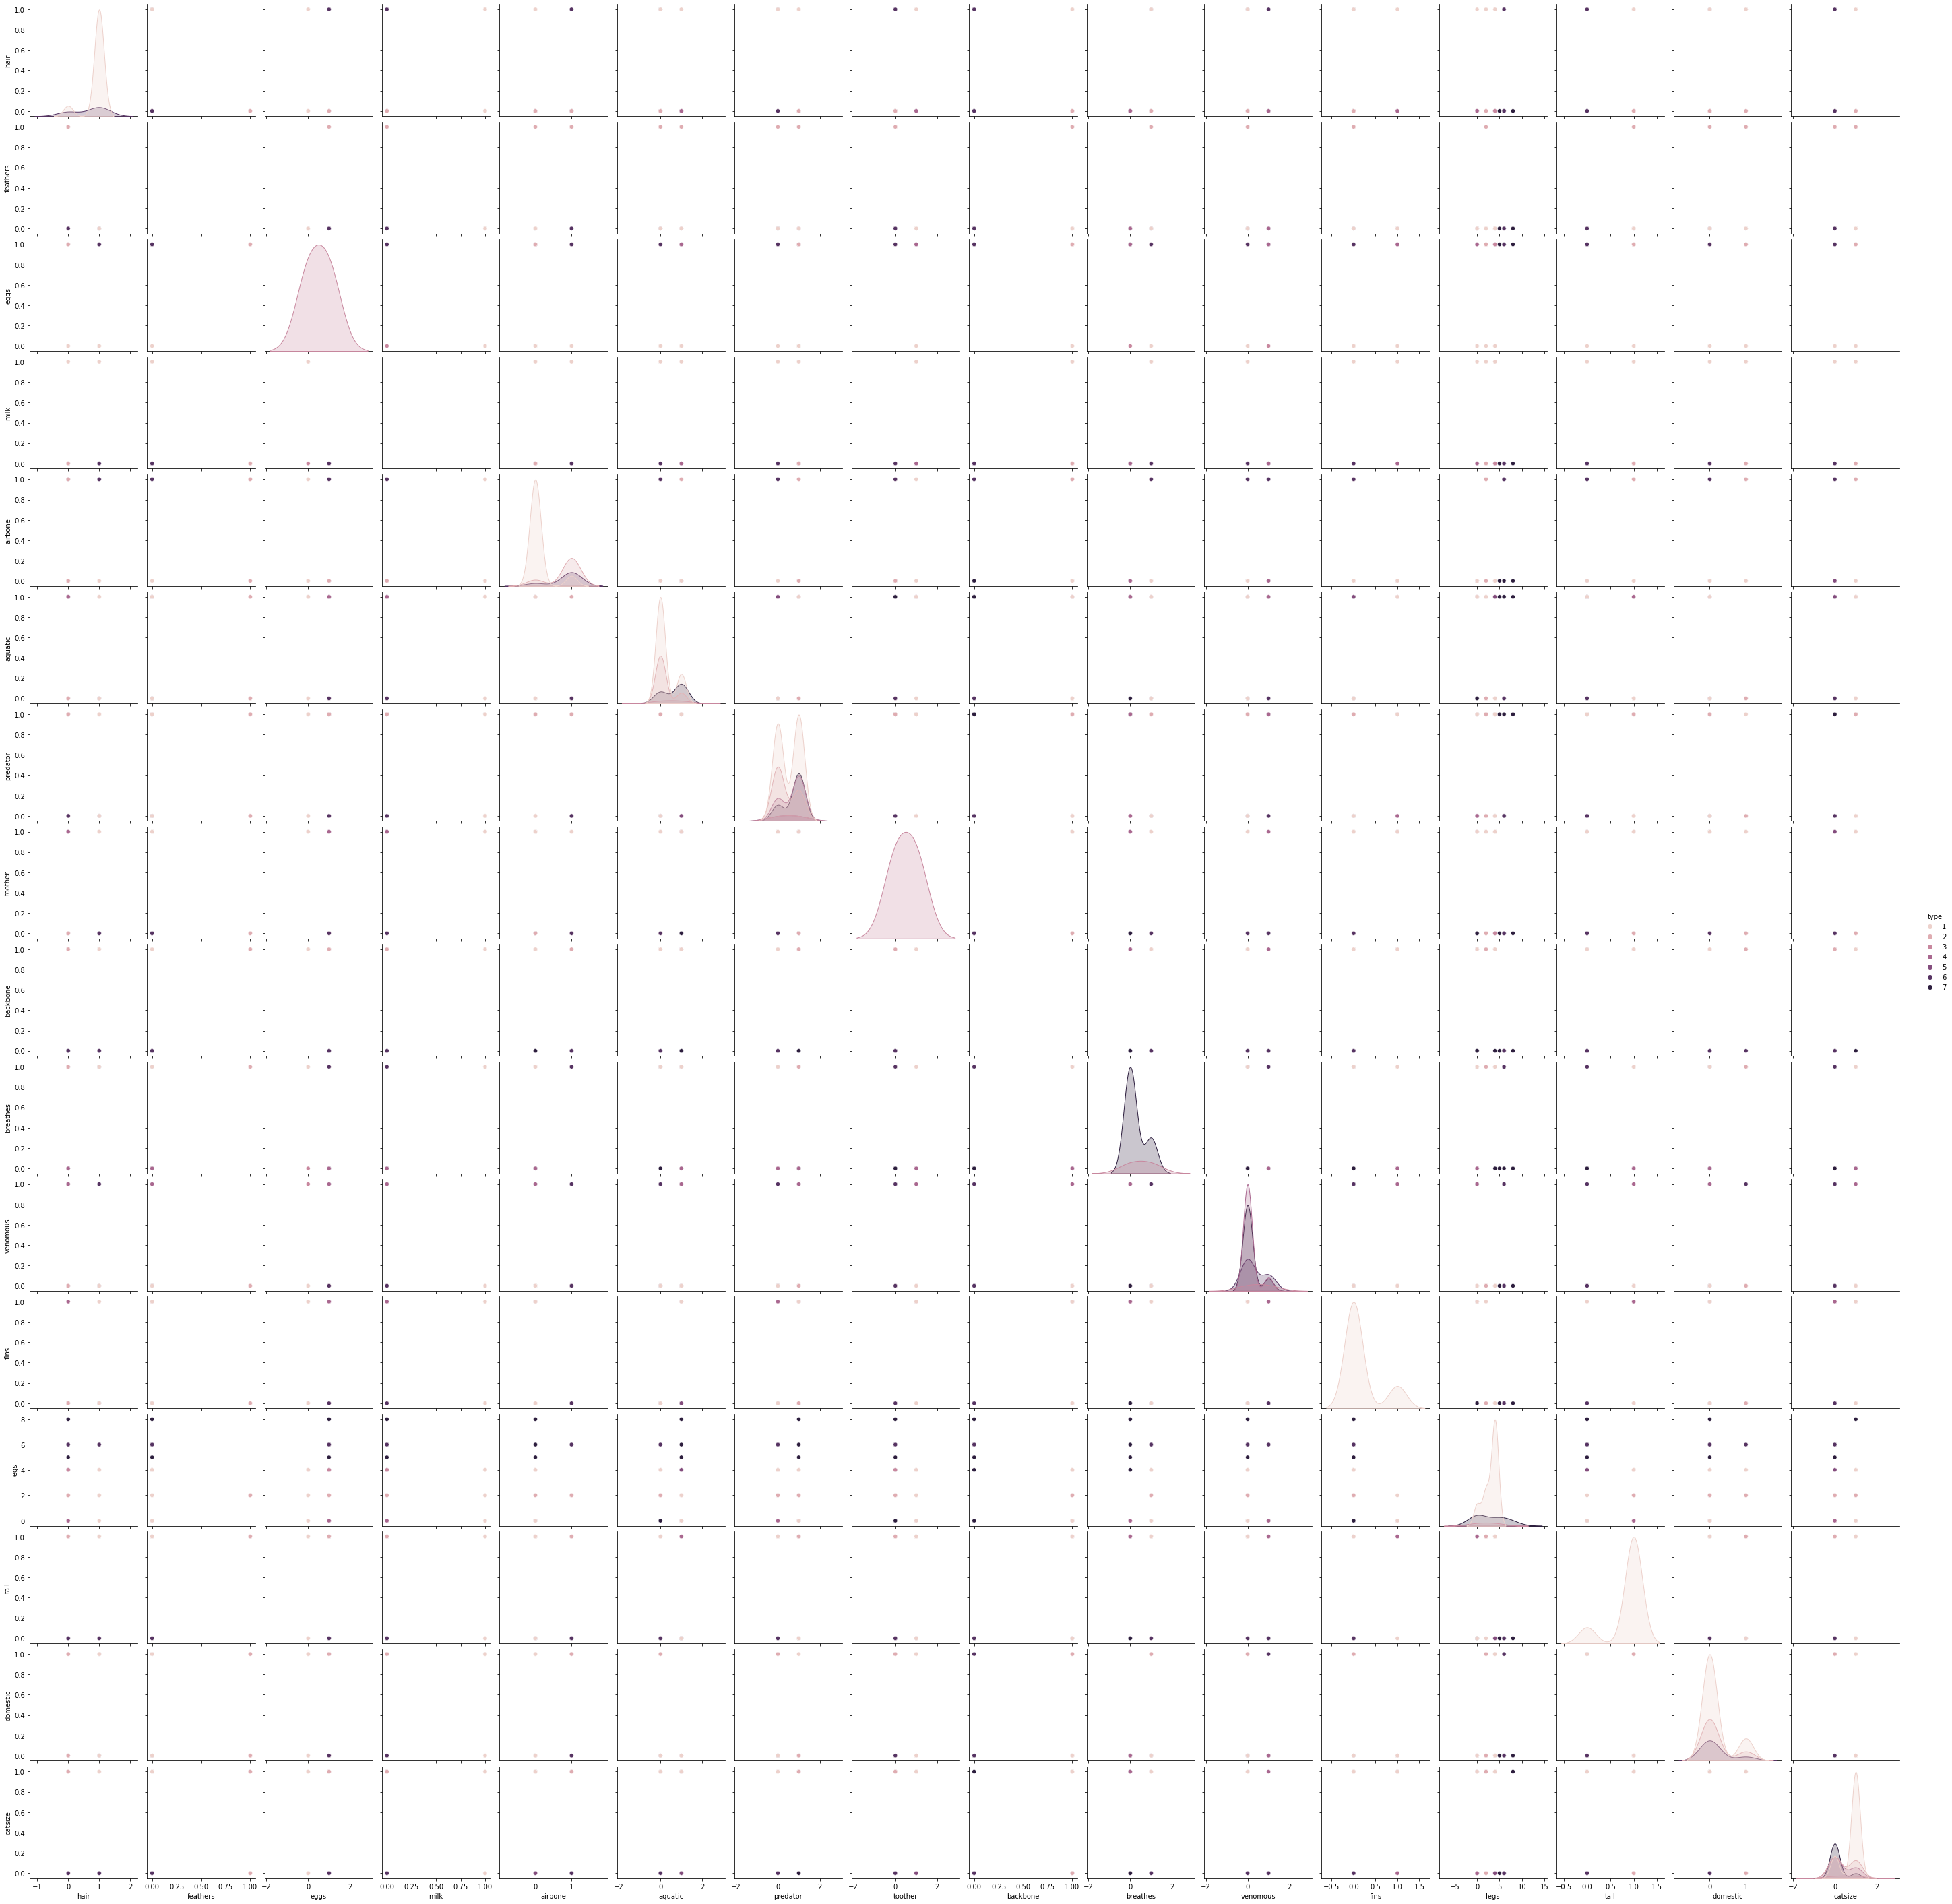

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **decision_tree_algorithm** definida previamente en esta guía, pasando como parametros:
1. El número máximo de iteraciones para que el algoritmo de regresión logística
2. El conjunto de datos de entrenamiento
3. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
4. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = decision_tree_algorithm(train_data, x_columns, y_column)

En el siguiente fragmento de código encontraremos como mostrar gráficamente las reglas de inferencia para realizar la predicción generadas por el algoritmo.

[Text(267.84000000000003, 203.85, 'milk <= 0.5\ngini = 0.775\nsamples = 61\nvalue = [23, 11, 2, 9, 2, 6, 8]\nclass = 1'),
 Text(234.36, 176.67000000000002, 'feathers <= 0.5\ngini = 0.785\nsamples = 38\nvalue = [0, 11, 2, 9, 2, 6, 8]\nclass = 2'),
 Text(200.88000000000002, 149.49, 'fins <= 0.5\ngini = 0.741\nsamples = 27\nvalue = [0, 0, 2, 9, 2, 6, 8]\nclass = 4'),
 Text(167.40000000000003, 122.31, 'airbone <= 0.5\ngini = 0.667\nsamples = 18\nvalue = [0, 0, 2, 0, 2, 6, 8]\nclass = 7'),
 Text(133.92000000000002, 95.13, 'backbone <= 0.5\ngini = 0.568\nsamples = 13\nvalue = [0, 0, 2, 0, 2, 1, 8]\nclass = 7'),
 Text(66.96000000000001, 67.94999999999999, 'legs <= 5.5\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]\nclass = 7'),
 Text(33.480000000000004, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 6]\nclass = 7'),
 Text(100.44000000000001, 40.77000000000001, 'predator <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]\nclass = 7'),
 Text(66.

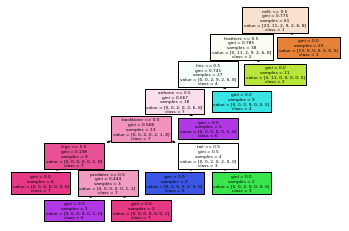

In [10]:
import matplotlib.pyplot as plt

target_class_names = ['1', '2', '3', '4', '5', '6', '7']

tree.plot_tree(model, filled=True, feature_names = x_columns, class_names = target_class_names)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [11]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1, 1, 1, 4, 1, 1, 2, 7, 2, 1, 4, 2, 6, 5, 1, 1, 1, 4, 2, 6, 2, 1,
       1, 3, 1, 2, 2, 4, 3, 1, 1, 1, 7, 2, 2, 3, 1, 3, 1, 1], dtype=int64)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [13]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [14]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Arboles de decisión', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [15]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Arboles de decisión,0.05,0.1,178.019,11.004
